In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [27]:
df=pd.read_excel("University_CLustering.xlsx")
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [29]:
len(df["Univ"].value_counts())

25

In [30]:
new_df=df.drop(["Univ","State"],axis=1)
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_df.iloc[:]=scaler.fit_transform(new_df.iloc[:])
new_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [32]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

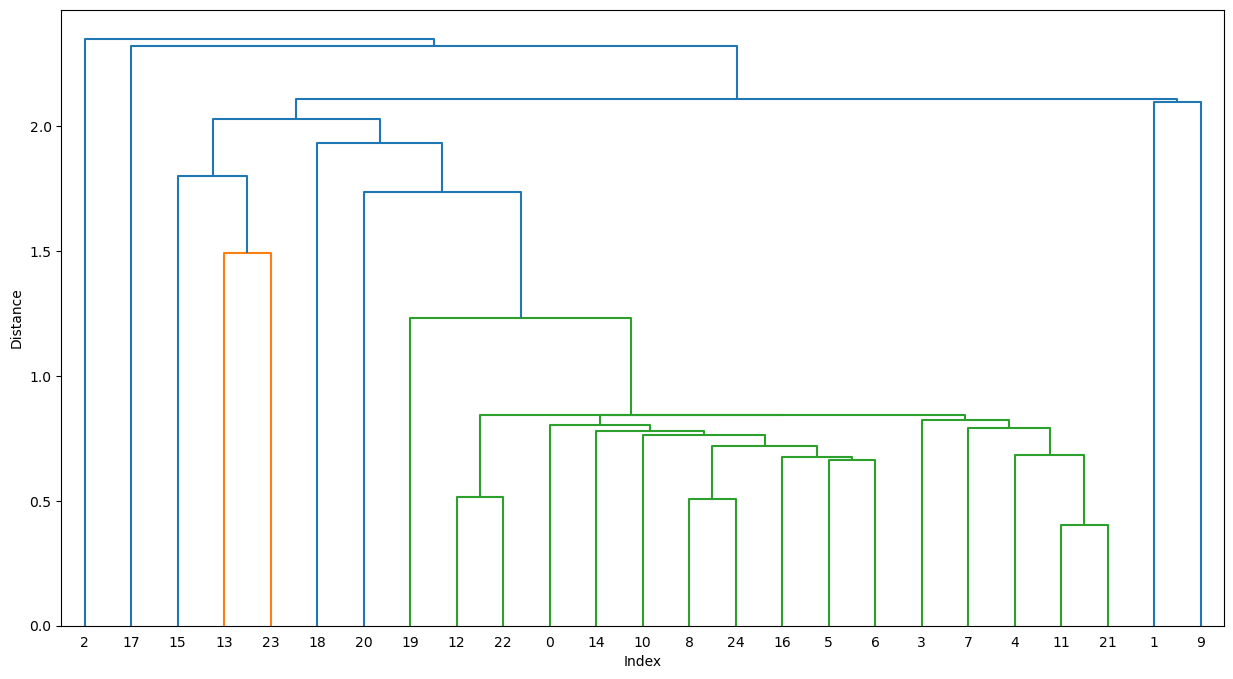

In [33]:
z=linkage(new_df)
plt.figure(figsize=(15,8))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
             )
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(new_df)

AgglomerativeClustering(n_clusters=3)

In [35]:
clustering.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [36]:
df["Class"]=clustering.labels_

In [37]:
df[df["Class"]==0]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [38]:
df[df["Class"]==1]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [39]:
df[df["Class"]==2]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [40]:
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components=pca.fit_transform(new_df)

In [50]:
components

array([[ 1.00987445, -1.06430962,  0.08106631],
       [ 2.82223781,  2.25904458,  0.83682883],
       [-1.11246577,  1.63120889, -0.26678684],
       [ 0.74174122, -0.04218747,  0.06050086],
       [ 0.31191206, -0.63524357,  0.01024052],
       [ 1.69669089, -0.34436328, -0.25340751],
       [ 1.24682093, -0.49098366, -0.03209382],
       [ 0.33874978, -0.78516859, -0.49358483],
       [ 2.37415013, -0.38653888,  0.11609839],
       [ 1.40327739,  2.11951503, -0.44282714],
       [ 1.72610332,  0.08823712,  0.17040366],
       [ 0.45085748, -0.01113295, -0.17574605],
       [-0.04023814, -1.00920438, -0.49651717],
       [-3.23373034, -0.37458049, -0.49537282],
       [ 2.23626502, -0.37179329, -0.39899365],
       [-5.17299212,  0.77991535, -0.38591233],
       [ 1.69964377, -0.30559745,  0.31850785],
       [-4.578146  , -0.34759136,  1.49964176],
       [-0.82260312, -0.69890615,  1.42781145],
       [ 0.09776213,  0.65044645,  0.10050844],
       [-1.9631826 , -0.22476756, -0.255

In [45]:
print(pca.explained_variance_ratio_)

[0.76868084 0.13113602 0.04776031]


In [51]:
from mpl_toolkits.mplot3d import Axes3D
pc0=components[:,0]
pc1=components[:,1]
pc2=components[:,2]

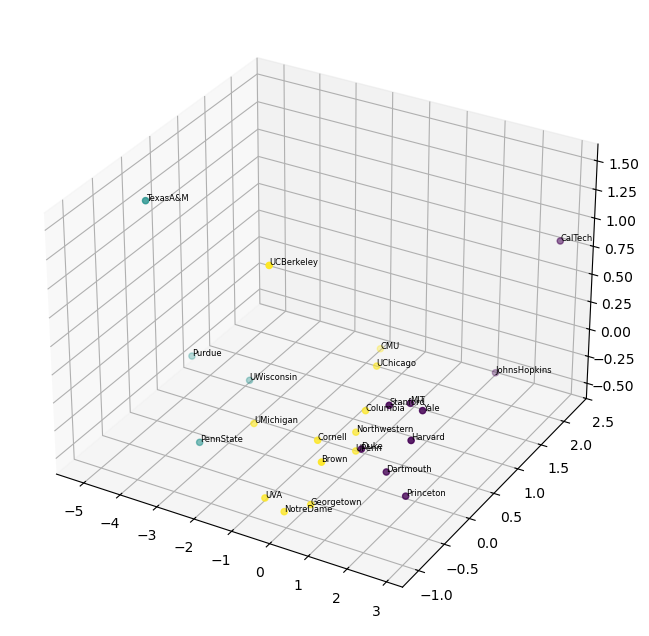

In [55]:
plt.figure(figsize=(15,8))
ax=plt.axes(projection="3d")
ax.scatter(pc0,pc1,pc2,c=df["Class"],cmap="viridis")
for i,u in enumerate(df["Univ"]):
    ax.text(pc0[i],pc1[i],pc2[i],u,fontsize=6,color="black")
plt.show()